In [5]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True) 

In [3]:
model.most_similar("hello")

[('hi', 0.654898464679718),
 ('goodbye', 0.639905571937561),
 ('howdy', 0.6310957074165344),
 ('goodnight', 0.5920578241348267),
 ('greeting', 0.5855878591537476),
 ('Hello', 0.5842196941375732),
 ("g'day", 0.5754077434539795),
 ('See_ya', 0.5688871145248413),
 ('ya_doin', 0.5643119812011719),
 ('greet', 0.5636603832244873)]

In [4]:
model.most_similar("coding")

[('coders', 0.6104331612586975),
 ('coder', 0.6063331365585327),
 ('Coding', 0.5804804563522339),
 ('formatting', 0.5671651363372803),
 ('soluble_receptors', 0.5576372146606445),
 ('ICD9', 0.5571348667144775),
 ('refactoring', 0.5495434999465942),
 ('database_schemas', 0.5372464656829834),
 ('recode', 0.534299373626709),
 ('XHTML_CSS', 0.5328801870346069)]

In [5]:
model.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.7609456777572632),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326233983039856),
 ('beagle', 0.7150583267211914),
 ('puppy', 0.7075453996658325),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931377410889),
 ('chihuahua', 0.6709762215614319)]

In [6]:
def transformSentence(sentence):
    outputSentence = ""
    
    for word in sentence.split(" "):
        try:
            outputSentence += model.most_similar(word)[0][0] + " "
        except Exception:
            outputSentence += word + " "
    return outputSentence

print(transformSentence("hello world"))

hi globe 


In [7]:
print(transformSentence("look mom no hands"))

looks Mom No hand 


In [8]:
print(transformSentence("The general idea of clustering is to group data with similar traits"))

This gen_eral concept of Clustering was to groups Data wtih similiar trait 


In [12]:
def removeFromString(string, chars):
    for c in chars:
        string = string.replace(c, "")
    return string


def transformSentenceWithHeuristic(sentence):
    outputSentence = ""
    
    for word in sentence.split(" "):
        try:
            changed = False
            for w, _ in model.most_similar(word):
                clean = removeFromString(w, [' ', '_']).lower()
                if clean not in word.lower() and "_" not in w:
                    outputSentence += w + " "
                    changed = True
                    break
            outputSentence = outputSentence if changed else outputSentence + word + " "
        except Exception:
            outputSentence += word + " "
    return outputSentence
print(transformSentenceWithHeuristic("The general idea of clustering is to group data with similar traits."))

This manager concept of clusters was to groups datasets wtih similiar traits. 


In [10]:
print(transformSentenceWithHeuristic("Sit down and grab a drink because it is time that we talk about the LSD trip that is the 1981 movie Shock Treatment."))

Relax up and grabbing a drinks but that was day it I talking abut this hallucinogenic trips it was this 1981 film Fever Treatment. 


In [15]:
print(model["cat"].shape)
print(model["cat"])

(300,)
[ 0.0123291   0.20410156 -0.28515625  0.21679688  0.11816406  0.08300781
  0.04980469 -0.00952148  0.22070312 -0.12597656  0.08056641 -0.5859375
 -0.00445557 -0.296875   -0.01312256 -0.08349609  0.05053711  0.15136719
 -0.44921875 -0.0135498   0.21484375 -0.14746094  0.22460938 -0.125
 -0.09716797  0.24902344 -0.2890625   0.36523438  0.41210938 -0.0859375
 -0.07861328 -0.19726562 -0.09082031 -0.14160156 -0.10253906  0.13085938
 -0.00346375  0.07226562  0.04418945  0.34570312  0.07470703 -0.11230469
  0.06738281  0.11230469  0.01977539 -0.12353516  0.20996094 -0.07226562
 -0.02783203  0.05541992 -0.33398438  0.08544922  0.34375     0.13964844
  0.04931641 -0.13476562  0.16308594 -0.37304688  0.39648438  0.10693359
  0.22167969  0.21289062 -0.08984375  0.20703125  0.08935547 -0.08251953
  0.05957031  0.10205078 -0.19238281 -0.09082031  0.4921875   0.03955078
 -0.07080078 -0.0019989  -0.23046875  0.25585938  0.08984375 -0.10644531
  0.00105286 -0.05883789  0.05102539 -0.0291748   0

In [17]:
import numpy as np

def createCorrelationMatrix(words):
    l = len(words)
    matrix = np.empty((l, l), np.float)
    
    for r in range(0, l):
        for c in range(0, l):
            matrix[r][c] = model.similarity(words[r], words[c])
    return matrix

testMatrix = ["cat", "dog", "computer"]
print(createCorrelationMatrix(testMatrix))

[[1.         0.76094574 0.17324439]
 [0.76094574 0.99999994 0.12194333]
 [0.17324439 0.12194333 1.        ]]


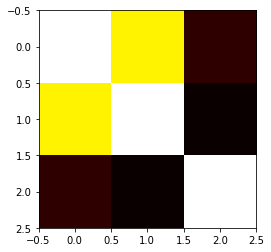

In [21]:
def displayMap(a):
    plt.imshow(a, cmap='hot', interpolation='nearest')
    plt.show()

displayMap(createCorrelationMatrix(testMatrix))

AxesImage(90,90;446.4x543.6)
AxesImage(90,90;446.4x543.6)


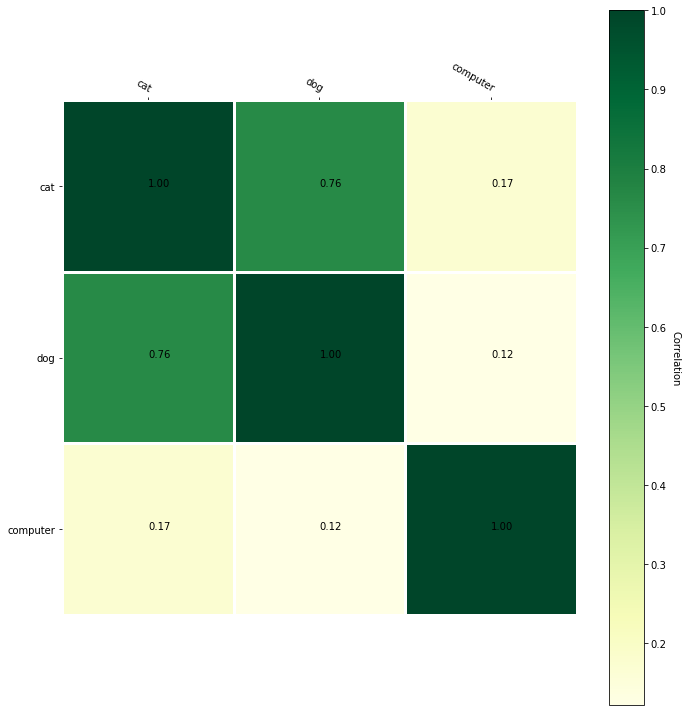

<Figure size 432x288 with 0 Axes>

In [48]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


def displayMap(a):
    plt.imshow(a, cmap='hot', interpolation='nearest')
    plt.show()
    
    
    
def heatmap(data, row_labels, col_labels, ax=None):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    cbar_kw={}
    ax = plt.gca()

    im = ax.imshow(data, cmap="YlGn")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, label="Correlation")
    cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    print(im)
    
    return im, cbar


def annotate_heatmap(im, data=None,
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """
    valfmt="{x:.2f}"
    textcolors=["black", "white"]
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None))
            texts.append(text)

    return texts

def plotWordCorrelations(words):
    fig, ax = plt.subplots(figsize=(10,10))
    
    matrix = createCorrelationMatrix(words)

    im, cbar = heatmap(matrix, words, words, ax=ax)
    
    print(im)
    texts = annotate_heatmap(im, valfmt="{x:.1f} t")

    fig.tight_layout()
    plt.show()
    plt.savefig(str(len(words)) + '.png')
    
    
plotWordCorrelations(["cat", "dog", "computer"])

AxesImage(90,90;446.4x543.6)
AxesImage(90,90;446.4x543.6)


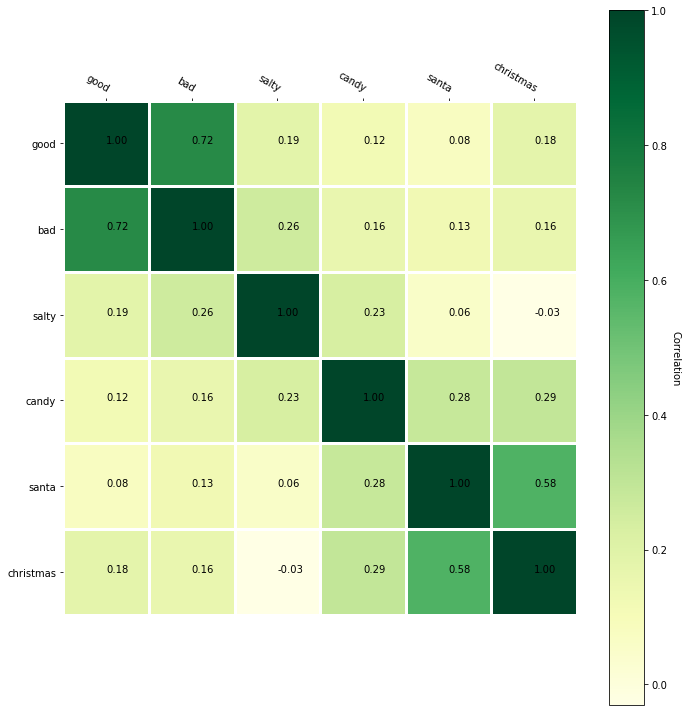

<Figure size 432x288 with 0 Axes>

In [49]:
plotWordCorrelations(["good", "bad", "salty", "candy", "santa", "christmas"])

In [11]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


MemoryError: Unable to allocate array with shape (3000000, 300) and data type float64